# 국민건강보험공단_건강검진정보_2021_12 분석
건강검진 결과지 제대로 읽는 법


https://health.chosun.com/site/data/html_dir/2016/11/30/2016113001291.html

In [1]:
url1="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_1.CSV"
url2="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_2.CSV"
url3="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_3.CSV"
url4="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_4.CSV"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
import pandas as pd

검진정보1=pd.read_csv(url1)
검진정보2=pd.read_csv(url2)
검진정보3=pd.read_csv(url3)
검진정보4=pd.read_csv(url4)

In [5]:
검진정보 = 검진정보1.append(검진정보2).append(검진정보3).append(검진정보4)
검진정보

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
249996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
249997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
249998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [6]:
검진정보_copy = 검진정보.copy()
검진정보_copy

dic1 = {11 : '서울특별시',
26 : '부산광역시',
27 : '대구광역시',
28 : '인천광역시',
29 : '광주광역시',
30 : '대전광역시',
31 : '울산광역시',
36 : '세종특별자치시',
41 : '경기도',
42 : '강원도',
43 : '충청북도',
44 : '충청남도',
45 : '전라북도',
46 : '전라남도',
47 : '경상북도' ,
48 : '경상남도',
49 : '제주특별자치도'}

age_list = ['0~4세','5~9세','10~14세',
                '15~19세','20~24세','25~29세',
                '30~34세','35~39세','40~44세',
                '45~49세','50~54세','55~59세',
                '60~64세','65~69세','70~74세',
               '75~79세','80~84세','85세 이상']
height_dic = {130 : '130~134cm', 135 : '135~139cm', 140 : '140~144cm',
                145 : '145~149cm', 150 : '150~154cm', 155 : '155~159cm',
                160 : '160~164cm', 165 : '165~169cm',
                170 : '170~174cm', 175 : '175~179cm', 180 : '180~184cm',
                185 : '185~189cm', 190 : '190~194cm', 195 : '195~199cm'}


# 코드 변환 후 새로운 칼럼 추가, 기존 코드 칼럼 삭제
검진정보_copy['시도명'] = 검진정보_copy['시도코드'].apply(lambda x : dic1[x])
검진정보_copy.drop('시도코드', axis=1, inplace=True)
검진정보_copy['연령대'] = 검진정보_copy['연령대 코드(5세단위)'].apply(lambda x:age_list[x-1])
검진정보_copy.drop('연령대 코드(5세단위)', axis=1, inplace=True)
검진정보_copy['성별'] = 검진정보_copy['성별코드'].apply(lambda x:'남자' if x==1 else '여자')
검진정보_copy.drop('성별코드', axis=1, inplace=True)
검진정보_copy['height'] = 검진정보_copy['신장(5Cm단위)'].apply(lambda x : height_dic[x])

# 연령대 중장노년으로 바꾸기
age1 = ((검진정보_copy['연령대'] == '40~44세') | (검진정보_copy['연령대'] == '45~49세'))
age2 = ((검진정보_copy['연령대'] == '50~54세') | (검진정보_copy['연령대'] == '55~59세') | (검진정보_copy['연령대'] == '60~64세'))
age3 = ((검진정보_copy['연령대'] == '65~69세') | (검진정보_copy['연령대'] == '70~74세') | (검진정보_copy['연령대'] == '75~79세') | (검진정보_copy['연령대'] == '80~84세') | (검진정보_copy['연령대'] =='85세 이상'))

검진정보_copy.loc[age1,'연령대'] = '중년'
검진정보_copy.loc[age2,'연령대'] = '장년'
검진정보_copy.loc[age3,'연령대'] = '노년'
검진정보_copy['연령대']

# 필요없는 칼럼 삭제
검진정보_copy.drop(['기준년도','가입자 일련번호','데이터 공개일자'], axis=1, inplace=True)

#시도명, 연령대, 성별 칼럼 맨 앞으로 가져오기
검진정보_copy1 = 검진정보_copy[['시도명', '연령대', '성별']]
검진정보_copy2 = 검진정보_copy.loc[:,'신장(5Cm단위)':'치석']
검진정보_merge = pd.concat([검진정보_copy1, 검진정보_copy2], axis=1)
검진정보_merge = 검진정보_merge.reset_index(drop = True)



# merge한 데이터 검진정보_copy에 저장


df = 검진정보_merge.copy()

# 데이터 전처리

# labeling

In [7]:
#간기능이상 
df['간 기능 이상'] = '의심'
con1 = ((df['(혈청지오티)AST'] >= 51)|(df['(혈청지오티)ALT'] >= 46))
con2 = ((df['(혈청지오티)AST'] <= 32) & (df['(혈청지오티)ALT'] <= 32))
con3 = (df['(혈청지오티)AST'].isnull()) & (df['(혈청지오티)ALT'].isnull())
df.loc[con1,'간 기능 이상'] = '비정상'
df.loc[con2,'간 기능 이상'] = '정상'
df.loc[con3, '간 기능 이상'] = '미관측'



In [8]:
#당뇨병 
df['당뇨병'] = '의심'
con1 = (df['식전혈당(공복혈당)'] >= 126)
con2 = (df['식전혈당(공복혈당)'] <= 120) & (df['식전혈당(공복혈당)'] >= 70)
con3 = df['식전혈당(공복혈당)'].isnull()
df.loc[con1,"당뇨병"] = '비정상'
df.loc[con2, '당뇨병'] = '정상'
df.loc[con3, '당뇨병'] = '미관측'

#저혈당
# http://www.samsunghospital.com/dept/main/index.do?DP_CODE=DM&MENU_ID=008037
df['저혈당']= '정상'
con1 = (df['식전혈당(공복혈당)'] < 70)
con2 = (df['식전혈당(공복혈당)'].isnull())
df.loc[con1,"저혈당"] = '비정상'
df.loc[con2,"저혈당"] = '미관측'





In [9]:
# 이상지질혈증
df['이상지질혈증HDL'] = df['HDL 콜레스테롤'].apply(lambda x:'yes' if 60 > x else 'no')
df['이상지질혈증LDL'] = df['LDL 콜레스테롤'].apply(lambda x:'yes' if 130 < x else 'no')

df['이상지질혈증'] = '미관측'

HDLcon = df['이상지질혈증HDL']=='yes'
LDLcon = df['이상지질혈증LDL']=='yes'
df.loc[HDLcon|LDLcon, '이상지질혈증'] = '비정상'

con1 = df['HDL 콜레스테롤'].isnull()
con2 = df['LDL 콜레스테롤'].isnull()
df.loc[con1,'이상지질혈증HDL'] = '미관측'
df.loc[con2,'이상지질혈증LDL'] = '미관측'

HDLcon2 = df['이상지질혈증HDL']=='no'
LDLcon2 = df['이상지질혈증LDL']=='no'
df.loc[HDLcon2&LDLcon2, '이상지질혈증'] = '정상'

In [10]:
# 비만
BMI = df['체중(5Kg 단위)'] / (df['신장(5Cm단위)']*0.01)**2
cond1 = (BMI <= 18.5)
cond2 = ((BMI > 18.5) & (BMI <= 23.0))
cond3 = ((BMI > 23.0) & (BMI <= 25.0))
cond4 = (BMI > 25.0)

df.loc[cond1, '비만'] = "저체중"
df.loc[cond2, '비만'] = "정상"
df.loc[cond3, '비만'] = "과체중"
df.loc[cond4, '비만'] = "고도비만"
df['BMI'] = BMI

In [11]:
#고혈압
df['고혈압']= '의심'
con1 = (df['수축기 혈압'] < 120) & (df['이완기 혈압'] < 80)
con2 = (df['수축기 혈압'] >= 145) | (df['이완기 혈압'] >=95)
con3 = (df['수축기 혈압'].isnull()) | (df['이완기 혈압'].isnull())
df.loc[con1,"고혈압"] = '정상'
df.loc[con3,"고혈압"] = '미관측'
df.loc[con2,"고혈압"] = '비정상'

#저혈압 
#https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=32144
df["저혈압"] = ''
con1 = (df['수축기 혈압'] < 120) & (df['이완기 혈압'] < 80) #정상
con2 = (df['수축기 혈압'] < 90)  & (df['이완기 혈압'] < 60) #비정상
con3 = (df['수축기 혈압'].isnull()) | (df['이완기 혈압'].isnull()) | (df['수축기 혈압'] >= 120) & (df['이완기 혈압'] >= 80)#미관측


df.loc[con1,"저혈압"] = '정상'
df.loc[con3,"저혈압"] = '미관측'
df.loc[con2,"저혈압"] = '비정상'



In [12]:
df1 = df.copy()

# 원핫인코딩 데이터

In [13]:
d_list = list(df.columns[-9:])
d_list.remove('이상지질혈증HDL')
d_list.remove('이상지질혈증LDL')
c_list = ['시도명','연령대','성별','신장(5Cm단위)','체중(5Kg 단위)']


df2 = pd.concat([df[c_list],pd.get_dummies(df[d_list])], axis=1)

In [14]:
df2

,시도명,연령대,성별,신장(5Cm단위),체중(5Kg 단위),BMI,당뇨병_미관측,당뇨병_비정상,당뇨병_의심,당뇨병_정상,...,비만_저체중,비만_정상,고혈압_미관측,고혈압_비정상,고혈압_의심,고혈압_정상,저혈압_,저혈압_미관측,저혈압_비정상,저혈압_정상
0,세종특별자치시,중년,남자,165,60,22.038567,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,대구광역시,장년,여자,150,65,28.888889,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,서울특별시,장년,여자,155,55,22.892820,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,울산광역시,장년,남자,160,70,27.343750,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,경기도,장년,여자,155,50,20.811655,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,경기도,장년,여자,145,55,26.159334,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
999996,부산광역시,장년,여자,160,55,21.484375,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
999997,경상남도,중년,남자,175,70,22.857143,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
999998,경상남도,중년,여자,160,70,27.343750,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [15]:
con1 = (df1['간 기능 이상'] == '정상')
con2 = (df1['당뇨병'] == '정상')
con3 = (df1['저혈당'] == '정상')
con4 = (df1['이상지질혈증'] == '정상')
con5 = (df1['비만'] == '정상')
con6 = (df1['고혈압'] == '정상')
con7 = (df1['저혈압'] == '정상')
df1[con1&con2&con3&con4&con5&con6&con7].shape


(19208, 38)

In [16]:
df1['저혈압'].value_counts()

미관측    391789
정상     331858
       275233
비정상      1120
Name: 저혈압, dtype: int64

In [17]:
d_columns = df2.columns[5:]

<AxesSubplot:ylabel='시도명'>

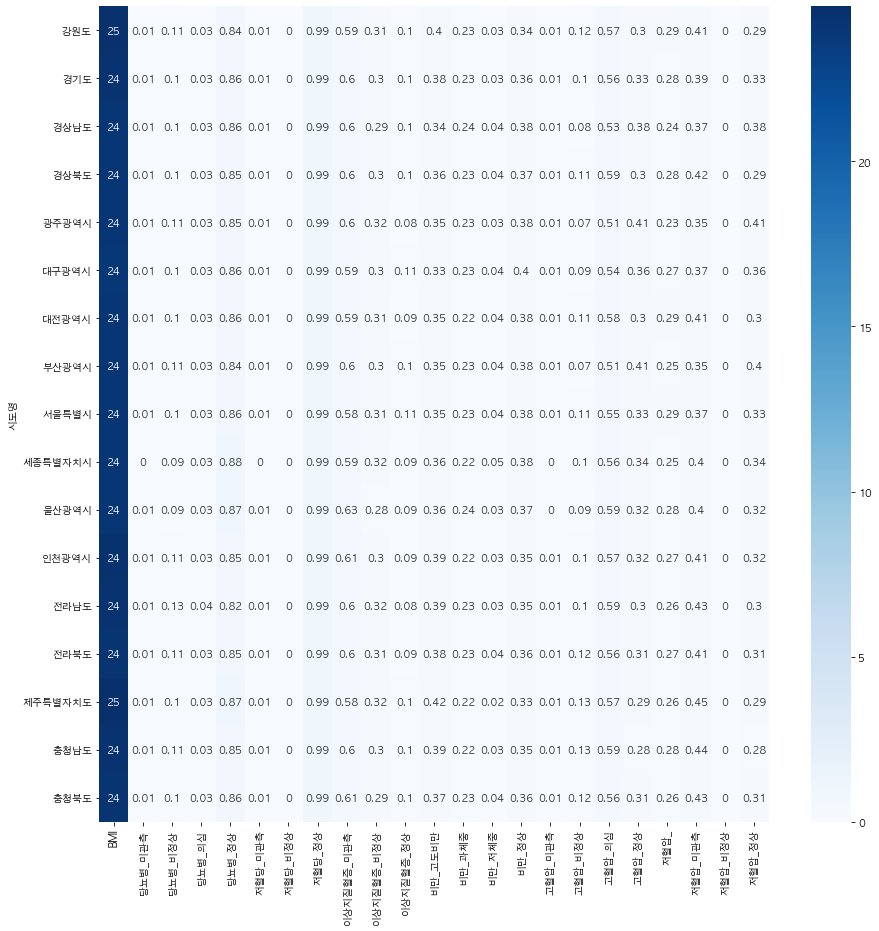

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.groupby('시도명')[d_columns].mean().round(2),annot=True,cmap='Blues')

<AxesSubplot:ylabel='연령대'>

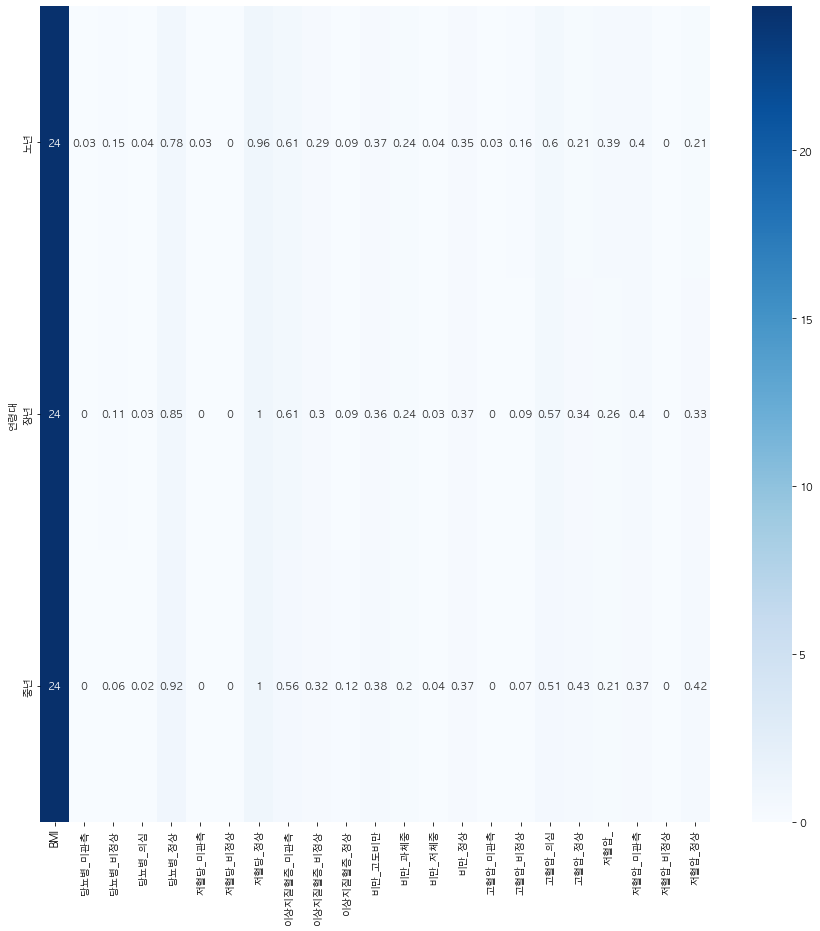

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.groupby('연령대')[d_columns].mean().round(2),annot=True,cmap='Blues',)

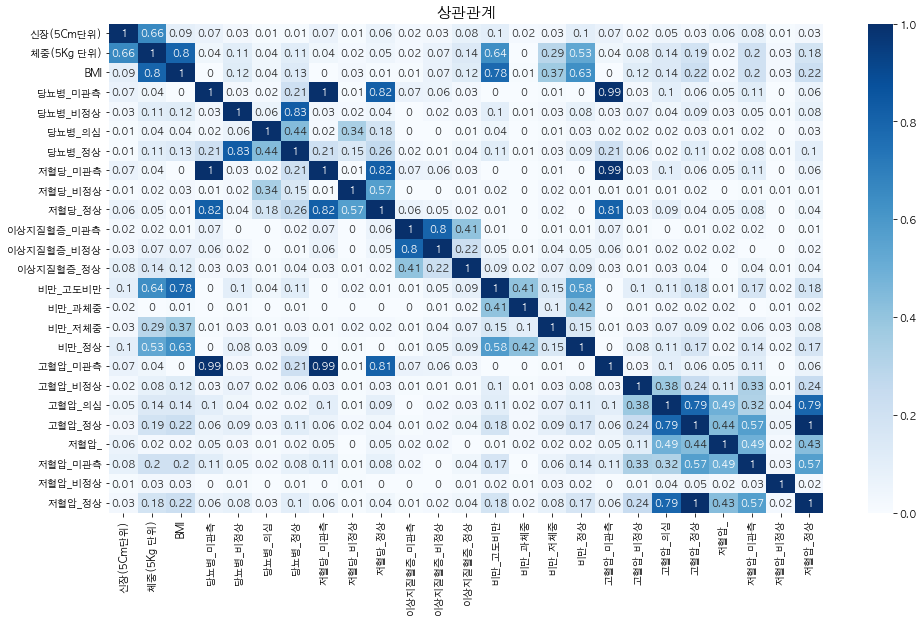

In [63]:
plt.figure(figsize=(16,9))
sns.heatmap(round(abs(df2.corr()),2), annot = True, cmap = 'Blues')
plt.title("상관관계", fontsize = 15)
plt.show()

In [20]:
new1 = df2.groupby('성별')[d_columns].mean()
new1 = new1.reset_index()
new1

,성별,BMI,당뇨병_미관측,당뇨병_비정상,당뇨병_의심,당뇨병_정상,저혈당_미관측,저혈당_비정상,저혈당_정상,이상지질혈증_미관측,...,비만_저체중,비만_정상,고혈압_미관측,고혈압_비정상,고혈압_의심,고혈압_정상,저혈압_,저혈압_미관측,저혈압_비정상,저혈압_정상
0,남자,24.807692,0.005363,0.133400,0.036901,0.824335,0.005363,0.003399,0.991237,0.614875,...,0.022440,0.282675,0.005314,0.111914,0.607798,0.274974,0.267938,0.457088,0.000476,0.274498
1,여자,23.610476,0.009938,0.075831,0.026016,0.888214,0.009938,0.004194,0.985868,0.581046,...,0.048485,0.459734,0.009851,0.090245,0.506388,0.393517,0.282847,0.323637,0.001792,0.391724


In [21]:
new2 = df2.groupby('연령대')[d_columns].mean()
new2 = new2.reset_index()
new2

,연령대,BMI,당뇨병_미관측,당뇨병_비정상,당뇨병_의심,당뇨병_정상,저혈당_미관측,저혈당_비정상,저혈당_정상,이상지질혈증_미관측,...,비만_저체중,비만_정상,고혈압_미관측,고혈압_비정상,고혈압_의심,고혈압_정상,저혈압_,저혈압_미관측,저혈압_비정상,저혈압_정상
0,노년,24.185767,0.033428,0.147171,0.041554,0.777847,0.033428,0.003371,0.963202,0.614030,...,0.035987,0.353416,0.033150,0.159617,0.600491,0.206743,0.391255,0.402002,0.000684,0.206059
1,장년,24.193740,0.000034,0.112825,0.033223,0.853917,0.000034,0.003457,0.996509,0.614005,...,0.029170,0.374440,0.000021,0.093478,0.571488,0.335012,0.261666,0.403322,0.001148,0.333864
2,중년,24.293422,0.000030,0.061636,0.021452,0.916882,0.000030,0.004623,0.995347,0.561786,...,0.044045,0.373233,0.000033,0.069651,0.505302,0.425014,0.209055,0.365931,0.001405,0.423609


In [22]:
new3 = df2.groupby('시도명')[d_columns].mean()
new3 = new3.reset_index()
new3

,시도명,BMI,당뇨병_미관측,당뇨병_비정상,당뇨병_의심,당뇨병_정상,저혈당_미관측,저혈당_비정상,저혈당_정상,이상지질혈증_미관측,...,비만_저체중,비만_정상,고혈압_미관측,고혈압_비정상,고혈압_의심,고혈압_정상,저혈압_,저혈압_미관측,저혈압_비정상,저혈압_정상
0,강원도,24.513106,0.011554,0.112669,0.031352,0.844424,0.011554,0.003029,0.985417,0.592699,...,0.031228,0.335821,0.011492,0.124504,0.568716,0.295288,0.294694,0.410018,0.001155,0.294132
1,경기도,24.313952,0.005393,0.104395,0.031916,0.858297,0.005393,0.004641,0.989966,0.598434,...,0.033917,0.362167,0.005336,0.104924,0.562702,0.327038,0.284389,0.388573,0.001269,0.325768
2,경상남도,24.048706,0.006494,0.098789,0.030760,0.863957,0.006494,0.003779,0.989727,0.604451,...,0.036495,0.384445,0.006421,0.079279,0.533168,0.381132,0.244039,0.374829,0.000861,0.380271
3,경상북도,24.136548,0.008523,0.103659,0.033065,0.854752,0.008523,0.004574,0.986903,0.600426,...,0.036684,0.371873,0.008523,0.105423,0.590396,0.295657,0.284379,0.419964,0.001065,0.294592
4,광주광역시,24.113156,0.008657,0.107108,0.033541,0.850694,0.008657,0.001752,0.989591,0.600273,...,0.033717,0.380520,0.008622,0.069851,0.508587,0.412940,0.234263,0.352797,0.000701,0.412239
5,대구광역시,23.951483,0.007870,0.098548,0.030364,0.863219,0.007870,0.004730,0.987400,0.594902,...,0.037366,0.396360,0.007828,0.090513,0.542726,0.358933,0.272902,0.368166,0.001115,0.357817
6,대전광역시,24.084793,0.008151,0.100043,0.028147,0.863659,0.008151,0.003194,0.988655,0.594737,...,0.038793,0.384769,0.008118,0.109758,0.578967,0.303157,0.285225,0.411618,0.001031,0.302126
7,부산광역시,24.079711,0.010880,0.111221,0.032959,0.844940,0.010880,0.003463,0.985657,0.602477,...,0.036653,0.383919,0.010764,0.074900,0.508903,0.405433,0.246997,0.347570,0.000797,0.404636
8,서울특별시,24.102578,0.007550,0.102015,0.030163,0.860273,0.007550,0.003261,0.989190,0.583604,...,0.038230,0.382059,0.007447,0.105474,0.553080,0.333999,0.291348,0.374653,0.001594,0.332405
9,세종특별자치시,24.087500,0.004489,0.086533,0.027090,0.881889,0.004489,0.004180,0.991331,0.591796,...,0.045511,0.376780,0.004334,0.099071,0.555573,0.341022,0.254334,0.404644,0.001393,0.339628


분할해서 시각화 가능한가?

### 질병과 성별

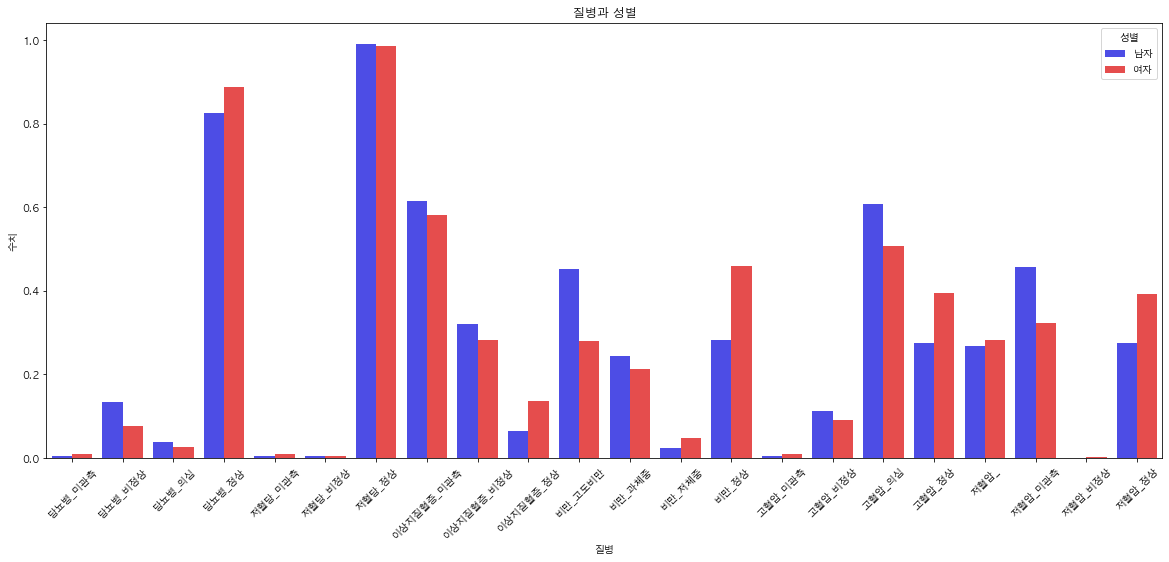

In [23]:
new_df1 = pd.DataFrame(new1.iloc[0,:])
new_df2 = pd.DataFrame(new1.iloc[1,:])

new_df1 = new_df1.drop('BMI')
new_df2 = new_df2 .drop('BMI')

new_df1.drop(new_df1.index[0], inplace=True)
new_df1.columns = ['수치']
new_df1['성별'] = '남자'
new_df1_index = new_df1.index

new_df1_1 = pd.DataFrame(new_df1_index)
new_df1= new_df1.reset_index()
new_df남자 = pd.concat([new_df1, new_df1_1], axis=1)
new_df남자
new_df남자.drop(0, inplace=True, axis=1)
new_df남자.columns = ['질병', '수치','성별']
new_df남자


new_df2.drop(new_df2.index[0], inplace=True)
new_df2.columns = ['수치']
new_df2['성별'] = '여자'
new_df2_index = new_df2.index

new_df2_1 = pd.DataFrame(new_df2_index)
new_df2= new_df2.reset_index()
new_df여자 = pd.concat([new_df2, new_df2_1], axis=1)
new_df여자
new_df여자.drop(0, inplace=True, axis=1)
new_df여자.columns = ['질병', '수치','성별']
new_df여자

final_df = pd.concat([new_df남자,new_df여자])
final_df

plt.figure(figsize=(20,8))
plt.title("질병과 성별")
sns.barplot(data=final_df, x='질병', y='수치', hue='성별', palette=['blue','red'], alpha=0.8)
plt.xticks(rotation =45)
plt.show()

*당뇨병 - 남자가 여자보다 당뇨병일 확률 높다.  
*이상지질혈증 - 남자가 여자보다 이상지질혈증일 확률 높다.  
*비만 - 남자가 여자보다 고도비만일 확률 높다, 과체중보다 고도비만이 더 많다.  
*고혈압 - 남자가 여자보다 고혈압일 확률 높다.  
-> 데이터로 예측 가능한 모든 질병가능성이 남자가 더 높다.

### 질병과 연령대

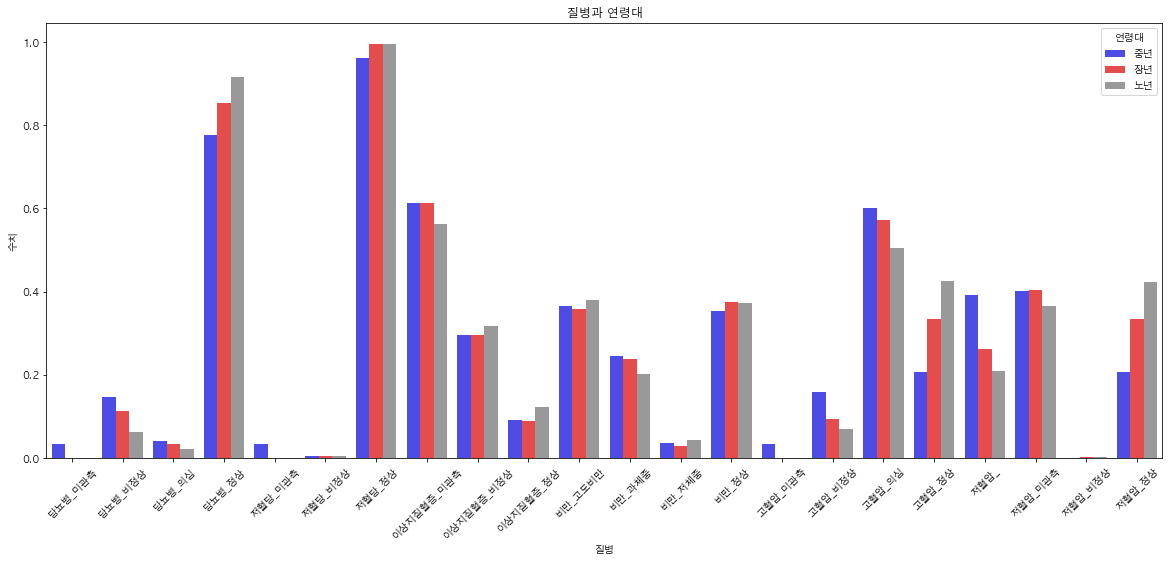

In [54]:
new_df1 = pd.DataFrame(new2.iloc[0,:])
new_df2 = pd.DataFrame(new2.iloc[1,:])
new_df3 = pd.DataFrame(new2.iloc[2,:])

new_df1 = new_df1.drop('BMI')
new_df2 = new_df2.drop('BMI')
new_df3 = new_df3.drop('BMI')

new_df1.drop(new_df1.index[0], inplace=True)
new_df1.columns = ['수치']
new_df1['연령대'] = '중년'
new_df1_index = new_df1.index

new_df1_1 = pd.DataFrame(new_df1_index)
new_df1= new_df1.reset_index()
new_df중년 = pd.concat([new_df1, new_df1_1], axis=1)
new_df중년
new_df중년.drop(0, inplace=True, axis=1)
new_df중년.columns = ['질병', '수치','연령대']
new_df중년


new_df2.drop(new_df2.index[0], inplace=True)
new_df2.columns = ['수치']
new_df2['연령대'] = '장년'
new_df2_index = new_df2.index

new_df2_1 = pd.DataFrame(new_df2_index)
new_df2= new_df2.reset_index()
new_df장년 = pd.concat([new_df2, new_df2_1], axis=1)
new_df장년
new_df장년.drop(0, inplace=True, axis=1)
new_df장년.columns = ['질병', '수치','연령대']
new_df장년

new_df3.drop(new_df3.index[0], inplace=True)
new_df3.columns = ['수치']
new_df3['연령대'] = '노년'
new_df3_index = new_df3.index

new_df3_1 = pd.DataFrame(new_df3_index)
new_df3= new_df3.reset_index()
new_df노년 = pd.concat([new_df3, new_df3_1], axis=1)
new_df노년
new_df노년.drop(0, inplace=True, axis=1)
new_df노년.columns = ['질병', '수치','연령대']
new_df노년

final_df = pd.concat([new_df중년,new_df장년,new_df노년])
final_df

plt.figure(figsize=(20,8))
plt.title("질병과 연령대")
sns.barplot(data=final_df, x='질병', y='수치', hue='연령대', palette=['blue','red','gray'], alpha=0.8)
plt.xticks(rotation =45)
plt.show()

*당뇨병 - 중년 > 장년 > 노년  
*이상지질혈증 - 모든 중년, 장년, 노년이 확률이 있지만 노년에서 질병 가능성 조금더 높다.    
*비만 - 고도비만이 과체중보다 많다.  
*고혈압 - 중년이 고혈압일 확률이 높다.  
*저혈압 - 중년이 저혈압일 확률도 높다.

# 남성과 여성 간건강에 대한 심층 분석

In [25]:
df.pivot_table(index = ['성별'],
               values=['감마 지티피','음주여부','식전혈당(공복혈당)','(혈청지오티)AST','(혈청지오티)ALT'])

,(혈청지오티)ALT,(혈청지오티)AST,감마 지티피,식전혈당(공복혈당),음주여부
성별,,,,,
남자,31.001443,29.336907,49.718945,107.474399,0.741792
여자,22.312075,25.980277,25.258336,100.885007,0.420934


음주여부에 의해 갈린건 아닌가?

In [26]:
df.pivot_table(index = ['성별','음주여부'],
               values=['감마 지티피','식전혈당(공복혈당)','(혈청지오티)AST','(혈청지오티)ALT'])

(혈청지오티)ALT  (혈청지오티)AST     감마 지티피  식전혈당(공복혈당)
성별 음주여부                                               
남자 0.0    29.300571   27.896224  34.212195  107.447438
   1.0    31.587820   29.833567  55.059597  107.484979
여자 0.0    22.781359   26.481747  24.177603  102.180491
   1.0    21.672779   25.299329  26.728777   99.124308

In [27]:
tem = df.pivot_table(index = ['성별','연령대'],
               values=['식전혈당(공복혈당)','감마 지티피','(혈청지오티)AST','(혈청지오티)ALT'])
tem = tem.reset_index()

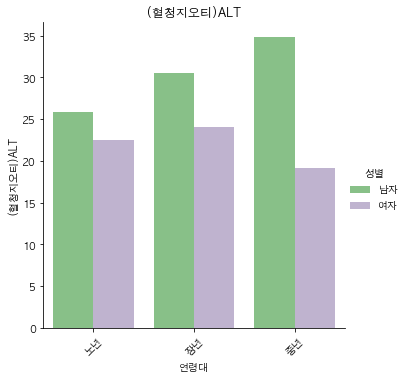

In [28]:
sns.catplot(x='연령대',y='(혈청지오티)ALT',data=tem,hue='성별',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("(혈청지오티)ALT")
plt.show()

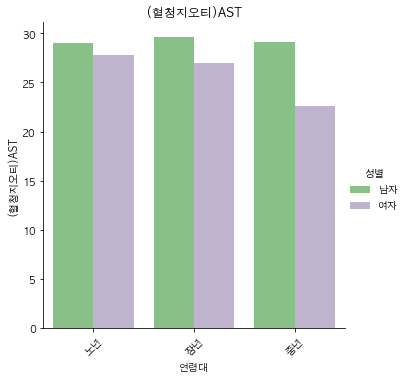

In [29]:
sns.catplot(x='연령대',y='(혈청지오티)AST',data=tem,hue='성별',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("(혈청지오티)AST")
plt.show()

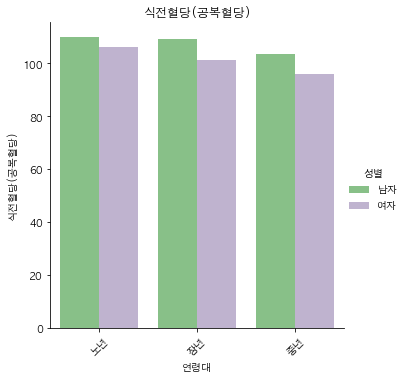

In [30]:
sns.catplot(x='연령대',y='식전혈당(공복혈당)',data=tem,hue='성별',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("식전혈당(공복혈당)")
plt.show()

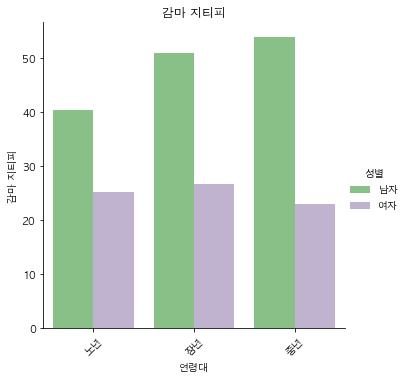

In [31]:
sns.catplot(x='연령대',y='감마 지티피',data=tem,hue='성별',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("감마 지티피")
plt.show()


감마 지티피 : 술을 많이 마시면 간에서 갑자기 증식하는 효소  
남성은 11 - 63, 여성은 8 - 35 이내가 정상  

## 남성과 여성 이상지질혈증 심층 분석

In [78]:
# 이상지질혈증은 HDL 콜레스테롤, LDL 콜레스테롤 로 예측가능
df.pivot_table(index = ['성별'],
               values=['HDL 콜레스테롤', 'LDL 콜레스테롤','총 콜레스테롤'])

,HDL 콜레스테롤,LDL 콜레스테롤,총 콜레스테롤
성별,,,
남자,52.228774,113.835729,195.263358
여자,61.131766,117.687160,201.526282


In [98]:
smoker = df.pivot_table(index = ['성별'],
              values = ['흡연상태'])
smoker

,흡연상태
성별,
남자,2.014826
여자,1.080009


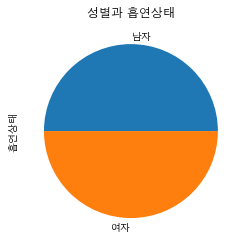

In [106]:
smoker.groupby('성별')['흡연상태'].count().plot(kind = "pie")
plt.title("성별과 흡연상태")
plt.show()

HDL 콜레스테롤은 많을수록 좋고(정상 60), LDL 콜레스테롤은 많을수록 좋지 않다(정상 120).  

남자 HDL 콜레스테롤 정상수치보다 적다.

저밀도 지단백(LDL) 콜레스테롤이 동맥경화증, 뇌혈관질환 등의 위험인자인 반면   
HDL 콜레스테롤은 동맥 내벽에 달라붙은 LDL 콜레스테롤을 제거해 동맥경화를 예방하는 역할을 한다.


In [89]:
# 흡연상태 : 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)

df.pivot_table(index = ['성별','흡연상태'],
               values=['HDL 콜레스테롤', 'LDL 콜레스테롤'])

HDL 콜레스테롤   LDL 콜레스테롤
성별 흡연상태                       
남자 1.0   52.438205  113.650659
   2.0   52.802543  112.900179
   3.0   51.383918  115.081303
여자 1.0   61.040273  117.804553
   2.0   64.101339  115.558923
   3.0   61.786894  115.623990

담배를 피고 있는 남자의 HDL 콜레스테롤 수치가 정상보다 10만큼 낮다.   


--------------------------------------------------------------

관련 자료 : http://www.monews.co.kr/news/articleView.html?idxno=207505

흡연하는 성인 남성 좋은 콜레스테롤인 HDL 콜레스테롤 수치가 정상수치보다 낮다.

남성에서 흡연과 HDL 콜레스테롤 관계 알 수 있음

In [82]:
temp1 = df.pivot_table(index = ['성별','흡연상태'],
               values=['HDL 콜레스테롤', 'LDL 콜레스테롤'])
temp1 = temp1.reset_index()

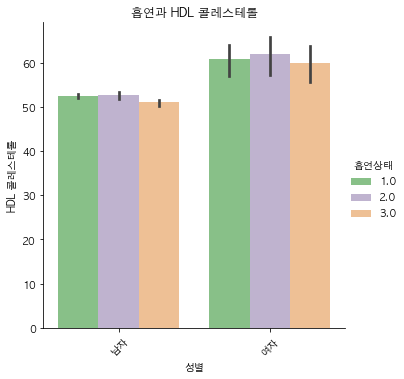

In [91]:
sns.catplot(x='성별',y='HDL 콜레스테롤',data=temp1,hue='흡연상태',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("흡연과 HDL 콜레스테롤")
plt.show()

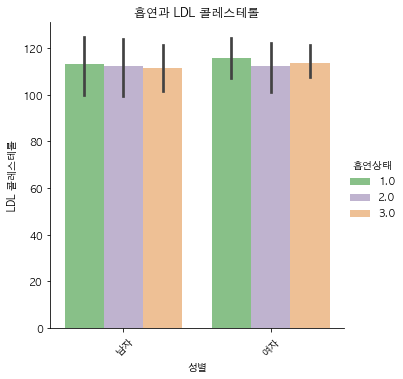

In [92]:
sns.catplot(x='성별',y='LDL 콜레스테롤',data=temp1,hue='흡연상태',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("흡연과 LDL 콜레스테롤")
plt.show()

LDL 콜레스테롤 과 흡연의 상관관계는 알 수 없음.  
다만, HDL 콜레스테롤은 동맥 내벽에 달라붙은 LDL 콜레스테롤을 제거해 동맥경화를 예방하는 역할을 하는데,  
흡연과 HDL 콜레스테롤의 상관관계를 알 수 있었음  

따라서, 흡연하는 남성은 HDL 콜레스테롤의 부족으로 동맥경화 가능성 높음.

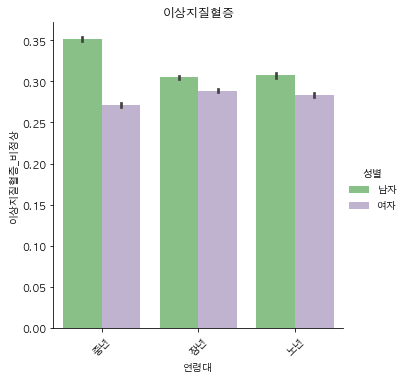

In [88]:
sns.catplot(x='연령대',y='이상지질혈증_비정상',data=df2,hue='성별',kind='bar',palette='Accent')
plt.xticks(rotation=45)
plt.title("이상지질혈증")
plt.show()

## 질병간의 상관관계

### 비만과 고혈압의 상관관계

<Figure size 1152x576 with 0 Axes>

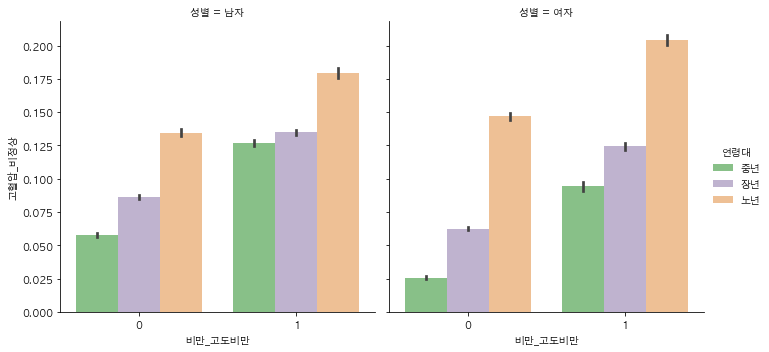

In [32]:
plt.figure(figsize=(16,8))
sns.catplot(x = '비만_고도비만', y = '고혈압_비정상',hue = '연령대', col = '성별',
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 고혈압환자는 고도비만에 상관없이 노년일수록 위험하다.
# 노년의 고도비만인 여자는 고혈압 환자일 확률이 남자보다 높다.
# 중년만 봤을 때, 고도비만에 상관없이 고혈압 환자일 확률이 남자가 여자보다 높다.
# 그리고 중년 남자가 고도비만일 때는 고도비만이 아닐 때보다 약 2배이상 높다.

<Figure size 1152x576 with 0 Axes>

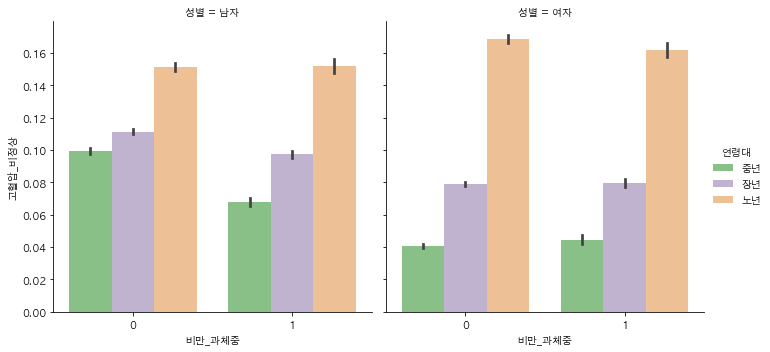

In [33]:
plt.figure(figsize=(16,8))
sns.catplot(x = '비만_과체중', y = '고혈압_비정상',hue = '연령대', col = "성별",
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 과체중인 사람들 역시 마찬가지로 노년층일수록 고혈압 환자일 확률이 높다. 
#(위 그래프와 비교했을 때, 고도비만이 과체중보다 위험하다)

<Figure size 1152x576 with 0 Axes>

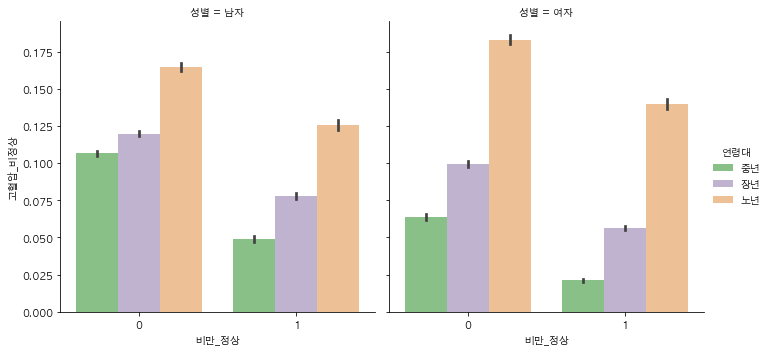

In [60]:
# 비만과 고혈압에 관계가 있을까? -> 비만이 아닌 사람과의 비교 그래프
plt.figure(figsize=(16,8))
sns.catplot(x = '비만_정상', y = '고혈압_비정상',hue = '연령대', col = "성별",
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 비만이 아닌 사람들이 성별에 상관없이 고혈압일 확률이 더 낮음을 알 수 있다.
# --> 비만일수록 고혈압 환자일 확률이 높다는 것.

### 비만과 당뇨병의 상관관계

<Figure size 1152x576 with 0 Axes>

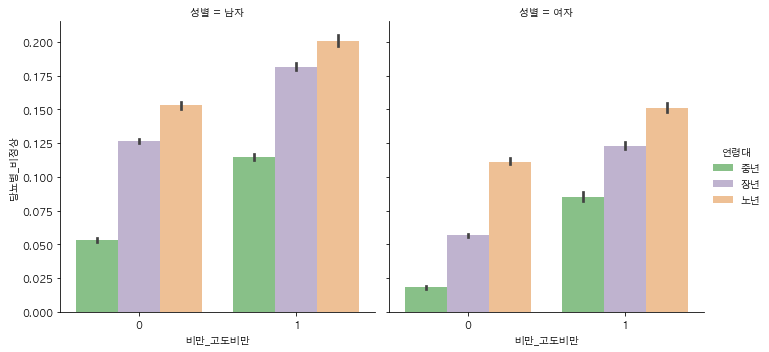

In [59]:
plt.figure(figsize=(16,8))
sns.catplot(x = '비만_고도비만', y = '당뇨병_비정상',hue = '연령대', col = "성별",
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 당뇨병에 걸릴 확률은 남자가 더 높다.
# 고도비만인 사람이 당뇨병에 걸릴 확률이 높다는 걸 알 수 있다.

<Figure size 1152x576 with 0 Axes>

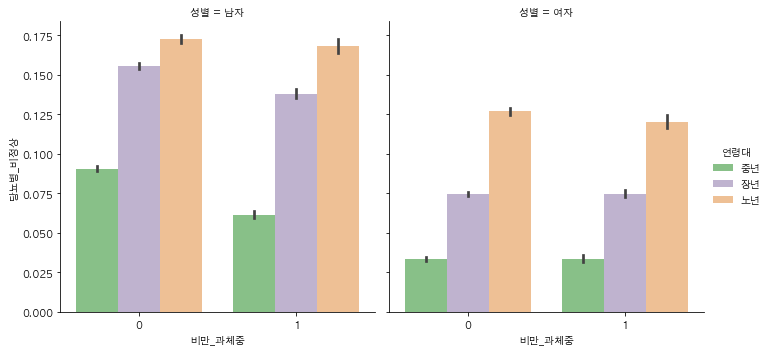

In [58]:
plt.figure(figsize=(16,8))
sns.catplot(x = '비만_과체중', y = '당뇨병_비정상',hue = '연령대', col = "성별",
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 과체중보다 고도비만이 당뇨병 환자일 확률이 높다.

<Figure size 1152x576 with 0 Axes>

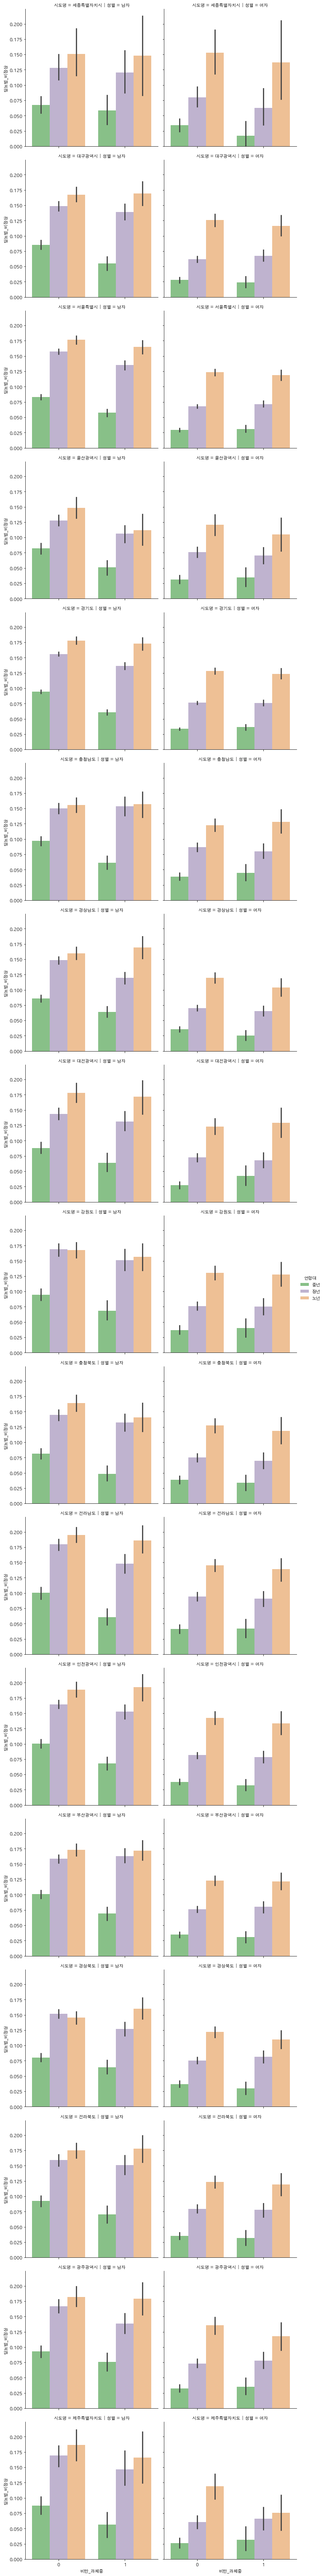

In [62]:
plt.figure(figsize=(16,8))
sns.catplot(x = '비만_과체중', y = '당뇨병_비정상',hue = '연령대', col = "성별", row = "시도명",
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 지역별... -> -----

### 당뇨병과 고혈압의 상관관계

<Figure size 1152x576 with 0 Axes>

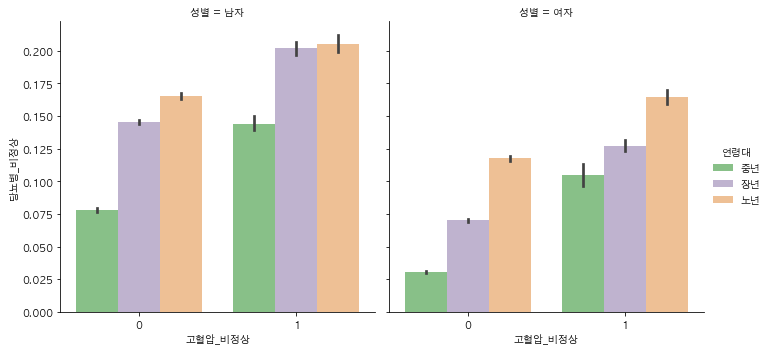

In [61]:
plt.figure(figsize=(16,8))
sns.catplot(x = '고혈압_비정상', y = '당뇨병_비정상',hue = '연령대', col = "성별",
            data = df2, kind = 'bar',palette='Accent')
plt.show()

# 고혈압일수록 당뇨병에 걸릴 확률 높다.

### 알콜남용자에 대한 통계 

https://m.blog.naver.com/molaid/221652361887

https://blog.naver.com/molaid/221639056036

In [36]:
df['알코올남용'] = '비남용자'
cond1 = (df['(혈청지오티)AST'] >= 51)
cond3 = (df['(혈청지오티)AST'] / df['(혈청지오티)ALT'] >= 2)
cond4 = (df['감마 지티피'] >= 50)
cond5 = (df['감마 지티피'] / df['(혈청지오티)ALT'] >= 2.5)
cond6 = (df['음주여부'] == 1)

'''
AST/ALT비율이 2 이상인 경우 알코올성 간질환을 강하게 시사함.
또한 r-GTP가 상승하고 r-GTP/ALT> 2.5이상이여도 강하게 시사함.
ALT는 범위에 포함시키지 않은 이유는 알코올때문에 ALT와 관련이 있는
PYRIDOXAL PHOSPHATE가 부족해지기 때문이다.


인산피리독살(P5P 또는 PYRIDIXAL PHOSPHATE 또는 비타민B6)은 알라닌 전이효소(ALT)의
완전한 촉매 활성에 필요한 보조인자.
'''


df.loc[cond1&cond3&cond6, '알코올남용'] = '남용자'
df.loc[cond1&cond4&cond5&cond6, '알코올남용'] = '남용자'
df.groupby('알코올남용').count()

,시도명,연령대,성별,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,간 기능 이상,당뇨병,저혈당,이상지질혈증HDL,이상지질혈증LDL,이상지질혈증,비만,BMI,고혈압,저혈압
알코올남용,,,,,,,,,,,,,,,,,,,,,
남용자,9271,9271,9271,9271,9271,9271,9270,9270,9271,9271,...,9271,9271,9271,9271,9271,9271,9271,9271,9271,9271
비남용자,990729,990729,990729,990729,990729,990621,990473,990478,990507,990499,...,990729,990729,990729,990729,990729,990729,990729,990729,990729,990729


In [37]:
df['알코올남용'].value_counts()

비남용자    990729
남용자       9271
Name: 알코올남용, dtype: int64

In [38]:
a = df.groupby('알코올남용').mean()
a.iloc[:,:15]

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소
알코올남용,,,,,,,,,,,,,,,
남용자,164.507604,65.860209,85.140977,0.942621,0.945750,1.050156,1.045518,130.105598,81.032790,117.024809,198.649933,234.572195,59.089640,100.153039,14.882914
비남용자,160.930926,63.034594,82.331040,0.932956,0.934936,1.046299,1.044058,124.782145,76.776209,104.137333,198.455932,132.895632,56.747997,115.953490,14.203109


In [39]:
a.iloc[:,16:]

,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,BMI
알코올남용,,,,,,,,,,
남용자,0.882164,88.680401,55.754795,280.342369,2.152319,1.000000,0.280013,0.233821,0.708783,24.241533
비남용자,0.851699,27.123269,26.486213,35.490882,1.551853,0.580914,0.331865,0.168075,0.583681,24.221697


(혈청지오티)AST, (혈청지오티)ALT, 감마 지티피, 음주여부, 흡연상태, 치아우식증유무, 트리글리세라이드

트리글리세라이드는 고중성지방은 심장질환의 위험인자로 낮을수록 좋다.  
과음과 상관관계가 존재한다. 

### 치아건강에 대한 분석 

#### 구강검진을 받은 사람의 비율 : 33%

원인?  
공통검사항목에 포함되어 있지만, 받아도 크게 도움이 되지 않을것이라고 생각해 안받는 경우가 많음. 
  
공통검사항목 : 비만, 시각,청각이상, 고혈압, 신장 질환, 빈혈증, 당뇨병, 간장질환,폐결핵/ 흉부질환, 구강질환(구강검진)  

또한, 구강검진은 건강보험공단이 지정한 다른 치과에서 받아야 하는 경우가 많음. => 귀찮아서 안함


In [40]:
df['구강검진 수검여부'].value_counts()[1] / 1000000

0.331384

### 구강검진 받은 사람 중 구강상태에 이상이 있는 사람의 비율은?  58%

In [41]:
df['구강검진 수검여부'].value_counts()

0    668616
1    331384
Name: 구강검진 수검여부, dtype: int64

In [42]:
df['치아우식증유무'].unique()

array([nan,  0.,  1.])

In [43]:
df['치석'].unique()

array([nan,  0.,  1.,  2.])

In [44]:
tooth = df.loc[df['구강검진 수검여부'] == 1,['치아우식증유무','구강검진 수검여부','치석']]
tooth.info()
tooth.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331384 entries, 3 to 999993
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   치아우식증유무    331383 non-null  float64
 1   구강검진 수검여부  331384 non-null  int64  
 2   치석         331382 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 10.1 MB


(331384, 3)

In [45]:
con1 = (tooth['치아우식증유무']==1) | (tooth['치석'] >=1)
tooth.loc[con1,:]

,치아우식증유무,구강검진 수검여부,치석
6,0.0,1,1.0
7,0.0,1,2.0
16,0.0,1,1.0
28,1.0,1,0.0
37,0.0,1,1.0
...,...,...,...
999981,1.0,1,2.0
999982,1.0,1,1.0
999988,0.0,1,1.0
999990,0.0,1,1.0


In [46]:
191529 / 331384

0.5779669507278565